In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns",None)
sns.set_theme(style="whitegrid")
plt.style.use("default")

In [ ]:
sentiment_df = pd.read_csv("fear_greed_index.csv")
trades_df = pd.read_csv("historical_data.csv")

In [ ]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sentiment_df.info()
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

## Cleaning data and merging both data sets

In [ ]:
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")
trades_df.columns = trades_df.columns.str.strip().str.lower().str.replace(" ", "_")
#now we can use both datasets and we dont have to worry about columns name

In [ ]:
sentiment_df.info()
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   start_position    211224 non-nu

In [ ]:
trades_df["timestamp_ist"] = pd.to_datetime(
    trades_df["timestamp_ist"],
    format="%d-%m-%Y %H:%M",#there was a format issue and we fixed it python expect m d Y but we fixed it
    errors="coerce"
)

In [ ]:
trades_df["timestamp_ist"].isna().sum()

np.int64(0)

In [ ]:
trades_df["timestamp_ist"] = pd.to_datetime(trades_df["timestamp_ist"])
trades_df["date"] = trades_df["timestamp_ist"].dt.date

In [ ]:
sentiment_df["timestamp"] = pd.to_datetime(sentiment_df["timestamp"],unit='s')
sentiment_df["date"] = sentiment_df["timestamp"].dt.date
#doing same thing extracting date aand other stuff

In [ ]:
sentiment_df[["timestamp", "date", "classification", "value"]].head()

,timestamp,date,classification,value
0,2018-02-01 05:30:00,2018-02-01,Fear,30
1,2018-02-02 05:30:00,2018-02-02,Extreme Fear,15
2,2018-02-03 05:30:00,2018-02-03,Fear,40
3,2018-02-04 05:30:00,2018-02-04,Extreme Fear,24
4,2018-02-05 05:30:00,2018-02-05,Extreme Fear,11


In [ ]:
trades_df["date"] = pd.to_datetime(trades_df["date"]).dt.date
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

In [ ]:
print("Trade date range:", trades_df["date"].min(), "to", trades_df["date"].max())
print("Sentiment date range:", sentiment_df["date"].min(), "to", sentiment_df["date"].max())
#finally it wroked i was using ms but it was s hehe

Trade date range: 2023-05-01 to 2025-05-01
Sentiment date range: 2018-02-01 to 2025-05-02


In [ ]:
common_dates = set(trades_df["date"]).intersection(set(sentiment_df["date"]))
print("Number of common dates:", len(common_dates))

Number of common dates: 479


In [ ]:
sentiment_df["timestamp"].describe()

,timestamp
count,2644
mean,2021-09-17 17:14:45.022693120
min,2018-02-01 05:30:00
25%,2019-11-26 23:30:00
50%,2021-09-17 17:30:00
75%,2023-07-10 11:30:00
max,2025-05-02 05:30:00


In [ ]:
df = trades_df.merge(sentiment_df[["date","classification","value"]],on="date",how="inner")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211218 non-null  object        
 1   coin              211218 non-null  object        
 2   execution_price   211218 non-null  float64       
 3   size_tokens       211218 non-null  float64       
 4   size_usd          211218 non-null  float64       
 5   side              211218 non-null  object        
 6   timestamp_ist     211218 non-null  datetime64[ns]
 7   start_position    211218 non-null  float64       
 8   direction         211218 non-null  object        
 9   closed_pnl        211218 non-null  float64       
 10  transaction_hash  211218 non-null  object        
 11  order_id          211218 non-null  int64         
 12  crossed           211218 non-null  bool          
 13  fee               211218 non-null  float64       
 14  trad

## Starting our EDA

In [ ]:
df["classification"] = df["classification"].str.title()
df["classification"].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


### Profitability and sentiment
**Conclusion**
* Greed have higher negatives but more positives also
* Neutral have lowest negatives
* Fear and Extreme fear have almost same negative and positive
* Extreme greed is worse

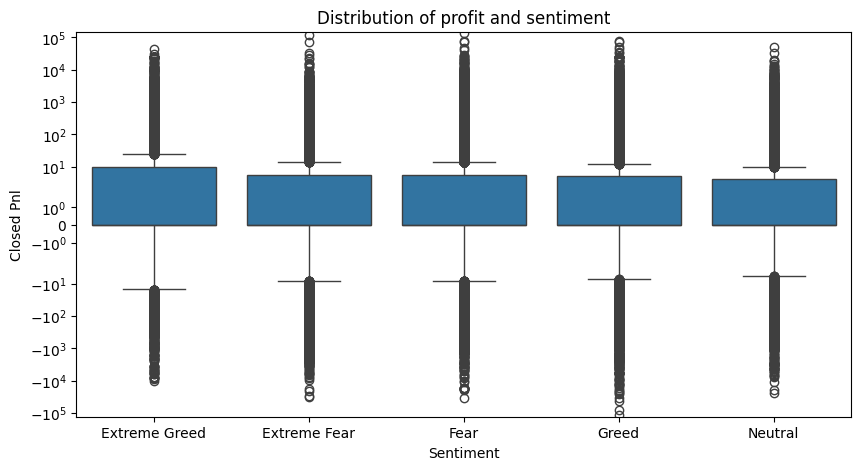

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="classification",y="closed_pnl")
plt.yscale("symlog")
plt.title("Distribution of profit and sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Closed Pnl")
plt.show()

###Win Rate and Sentiment
**Conclusion**
* Extreme fear and fear sentiment have good win rate

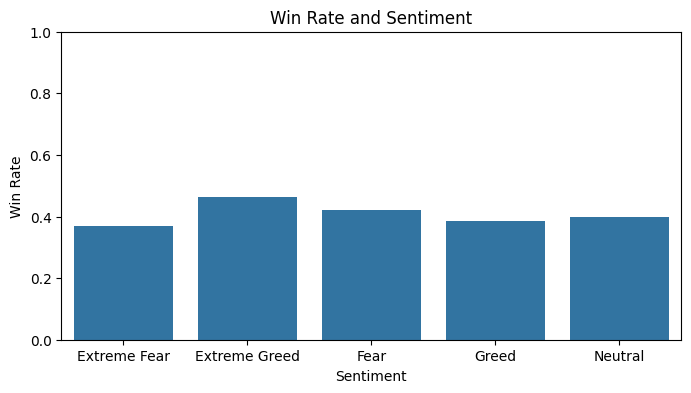

In [ ]:
df["is_profitable"] = df["closed_pnl"]>0
win_rate=(df.groupby("classification")["is_profitable"].mean().reset_index())

plt.figure(figsize=(8,4))
sns.barplot(data=win_rate,x="classification",y="is_profitable")
plt.title("Win Rate and Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Win Rate")
plt.ylim(0,1)
plt.show()

### Size and sentiment
**conclusion**
* Fear contributes most for larger bets(risk beahviour)
* Extreme greed has low bets(surprising)

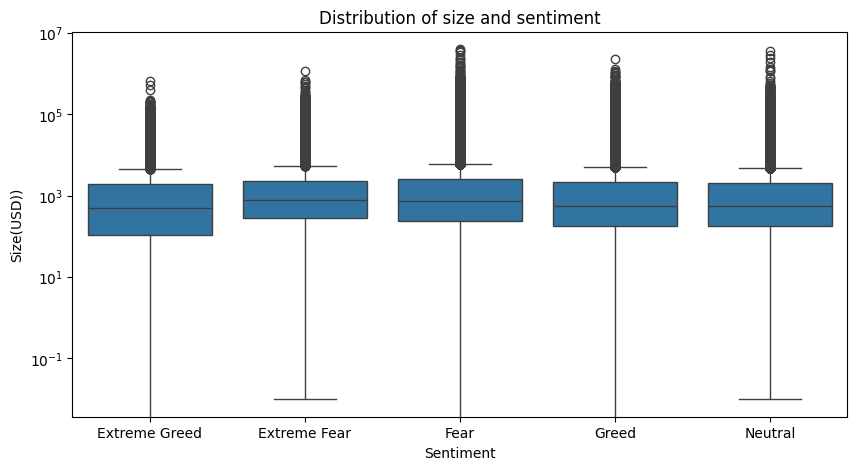

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="classification",y="size_usd")
plt.yscale("log")
plt.title("Distribution of size and sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Size(USD))")
plt.show()

###Direction and Sentiment
**Conclusion**
* During fear open long and close long are very high indicating managing positions means no trading
* Extreme fear have close long and close short means they are defensive
* liquidations and auto deleveraging are rare

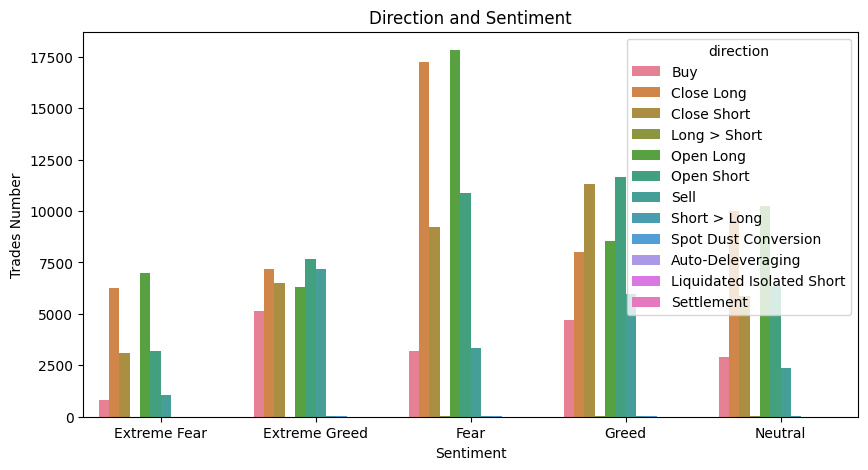

In [ ]:
direction_dist = (df.groupby(["classification","direction"]).size().reset_index(name="count"))

plt.figure(figsize=(10,5))
sns.barplot(data=direction_dist,x="classification",y="count",hue="direction")
plt.title("Direction and Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Trades Number")
plt.show()

###Loss and sentiment
**Conclusion**
* Greed have most loses
* Fear and extreme greed have are next in line for most loses indicating greed and fear are reaaly influencing traders

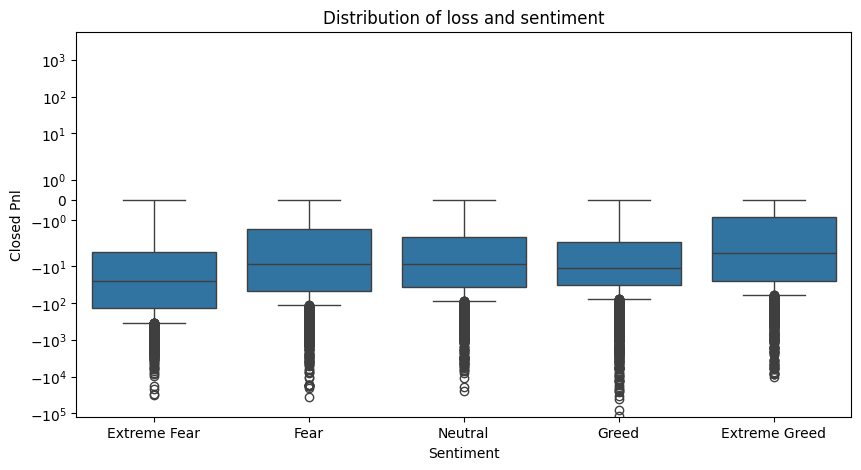

In [ ]:
loss_df = df[df["closed_pnl"]<0]

plt.figure(figsize=(10,5))
sns.boxplot(data=loss_df, x="classification",y="closed_pnl")
plt.yscale("symlog")
plt.title("Distribution of loss and sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Closed Pnl")
plt.show()

### Sentiment strenght and Behaviour
**Conclusion**
* not able to interpret

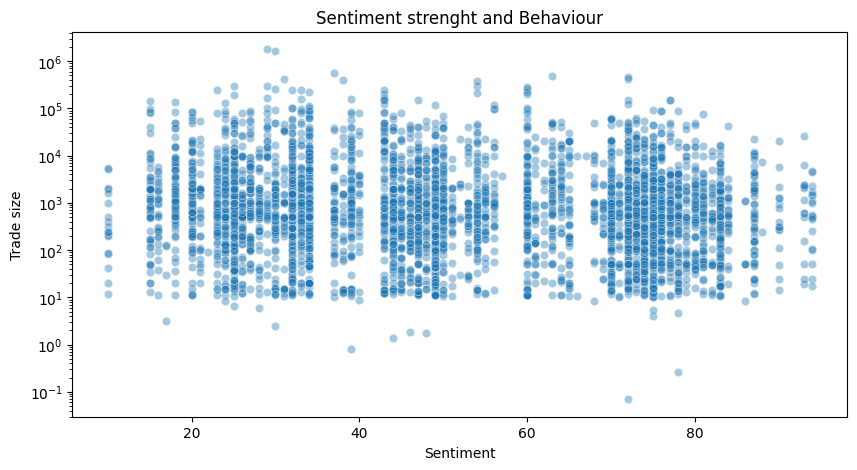

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df.sample(5000,random_state=42),x="value",y="size_usd",alpha=0.4)

plt.yscale("log")
plt.title("Sentiment strenght and Behaviour")
plt.xlabel("Sentiment")
plt.ylabel("Size")
plt.ylabel("Trade size")
plt.show()

**conclusion**
* Median rade size is stable
* means absence of strong trend
* spike at 40 caused by vfery few traders so it is not behavioural

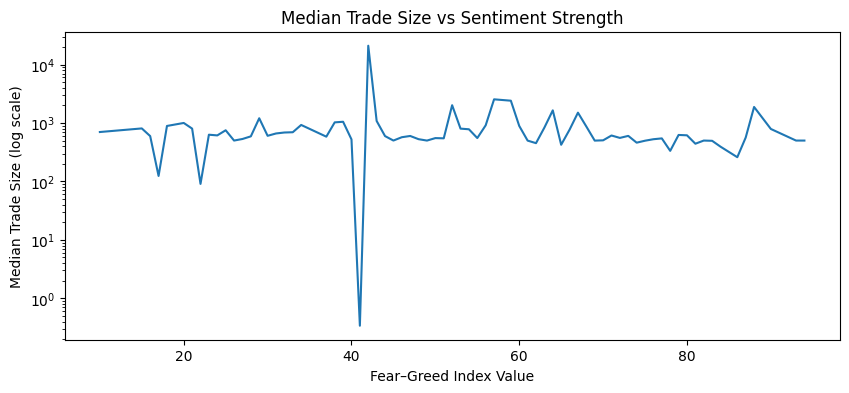

In [ ]:
sentiment_bin = (df.groupby("value")["size_usd"].median().reset_index())

plt.figure(figsize=(10, 4))
plt.plot(sentiment_bin["value"], sentiment_bin["size_usd"])
plt.yscale("log")
plt.title("Median Trade Size vs Sentiment Strength")
plt.xlabel("Fear–Greed Index Value")
plt.ylabel("Median Trade Size (log scale)")
plt.show()

###To get some more insights we will do feature engineering

In [ ]:
df["is_profitable"] = (df["closed_pnl"]>0).astype(int)#only positive closes are profitable

In [ ]:
df["abs_pnl"] = df["closed_pnl"].abs()

In [ ]:
df["exposure"] = df["size_usd"]

In [ ]:
def sentiment_regime(x):
    if x in ["Extreme Fear", "Fear"]:
        return "Fear"
    elif x in ["Greed", "Extreme Greed"]:
        return "Greed"
    else:
        return "Neutral"

df["sentiment_regime"] = df["classification"].apply(sentiment_regime)
#doing this because this reduces noise in our data and also it bacame much more inter pretable

In [ ]:
df["is_greed"] = (df["sentiment_regime"]=="Greed").astype(int)
#this will help in correlations

In [ ]:
df["pnl_per_usd"] = df["closed_pnl"] / (df["size_usd"]+1)

In [ ]:
df["loss_severity"] = df["abs_pnl"] * (df["closed_pnl"] < 0)

In [ ]:
df["is_long_related"] = df["direction"].str.contains("Long").astype(int)
df["is_short_related"] = df["direction"].str.contains("Short").astype(int)

In [ ]:
trader_sentiment_agg = (
    df.groupby(["account", "sentiment_regime"]).agg(
        total_trades=("closed_pnl", "count"),
        win_rate=("is_profitable", "mean"),
        avg_pnl=("closed_pnl", "mean"),
        pnl_volatility=("closed_pnl", "std"),
        avg_trade_size=("size_usd", "mean"),
        avg_loss_severity=("loss_severity", "mean")
    )
    .reset_index())

In [ ]:
df.head(10)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,value,is_profitable,abs_pnl,exposure,sentiment_regime,is_greed,pnl_per_usd,loss_severity,is_long_related,is_short_related
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,7872.16,Greed,1,0.0,0.0,0,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,127.68,Greed,1,0.0,0.0,0,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,1150.63,Greed,1,0.0,0.0,0,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,1142.04,Greed,1,0.0,0.0,0,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,69.75,Greed,1,0.0,0.0,0,0
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,11.27,Greed,1,0.0,0.0,0,0
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,2024-12-02 22:50:00,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,1151.77,Greed,1,0.0,0.0,0,0
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,2024-12-02 22:50:00,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,272.00,Greed,1,0.0,0.0,0,0
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,2024-12-02 22:50:00,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,368.00,Greed,1,0.0,0.0,0,0
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,2024-12-02 22:50:00,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12,2024-12-02,Extreme Greed,80,0,0.0,100.00,Greed,1,0.0,0.0,0,0


In [ ]:
df.tail(10)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,value,is_profitable,abs_pnl,exposure,sentiment_regime,is_greed,pnl_per_usd,loss_severity,is_long_related,is_short_related
211208,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1834.2,2019.45,SELL,2025-04-25 15:35:00,15955.1,Close Long,-97.2126,0x91ee3ee2673d3bb5da6a0422374d8c02032e0085d8eb...,88803313862,False,0.201945,3.010000e+14,1.750000e+12,2025-04-25,Greed,60,0,97.2126,2019.45,Greed,1,-0.048114,97.2126,1,0
211209,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2763.7,3042.83,SELL,2025-04-25 15:35:00,14120.9,Close Long,-146.4761,0xe12bbe92acbb41685b310422374d8c02032f001b8cca...,88803313862,False,0.304283,1.090000e+15,1.750000e+12,2025-04-25,Greed,60,0,146.4761,3042.83,Greed,1,-0.048122,146.4761,1,0
211210,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2518.5,2772.87,SELL,2025-04-25 15:35:00,11357.2,Close Long,-133.4805,0xe7847dc3b4513b1a6fc30422374d8c0203300046c97c...,88803313862,False,0.277286,1.360000e+14,1.750000e+12,2025-04-25,Greed,60,0,133.4805,2772.87,Greed,1,-0.048121,133.4805,1,0
211211,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1064.2,1171.68,SELL,2025-04-25 15:35:00,8838.7,Close Long,-56.4026,0x69083c7e09f93eaaa08a0422374d8e02026e00389c33...,88803313862,False,0.117168,1.850000e+14,1.750000e+12,2025-04-25,Greed,60,0,56.4026,1171.68,Greed,1,-0.048097,56.4026,1,0
211212,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,227.9,250.92,SELL,2025-04-25 15:35:00,7774.5,Close Long,-12.0787,0xcf2f22ba82614f04957b0422374d8e020273005c5568...,88803313862,False,0.025091,4.270000e+14,1.750000e+12,2025-04-25,Greed,60,0,12.0787,250.92,Greed,1,-0.047947,12.0787,1,0
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,2025-04-25 15:35:00,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed,60,0,20.2566,420.80,Greed,1,-0.048024,20.2566,1,0
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,2025-04-25 15:35:00,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed,60,0,112.5773,2338.63,Greed,1,-0.048118,112.5773,1,0
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,2025-04-25 15:35:00,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed,60,0,22.4402,466.16,Greed,1,-0.048035,22.4402,1,0
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,2025-04-25 15:35:00,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed,60,0,190.7894,3963.38,Greed,1,-0.048126,190.7894,1,0
211217,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,2025-04-25 15:35:00,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12,2025-04-25,Greed,60,0,53.9063,1119.83,Greed,1,-0.048095,53.9063,1,0


In [ ]:
#creating final df
final_cols = [
    "account",
    "coin",
    "execution_price",
    "size_usd",
    "side",
    "direction",
    "closed_pnl",
    "fee",
    "timestamp_ist",
    "date",
    "classification",
    "value",
    "sentiment_regime",
    "is_greed",
    "is_profitable",
    "abs_pnl",
    "exposure",
    "pnl_per_usd",
    "loss_severity"
]

df_final = df[final_cols].copy()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211218 non-null  object        
 1   coin              211218 non-null  object        
 2   execution_price   211218 non-null  float64       
 3   size_usd          211218 non-null  float64       
 4   side              211218 non-null  object        
 5   direction         211218 non-null  object        
 6   closed_pnl        211218 non-null  float64       
 7   fee               211218 non-null  float64       
 8   timestamp_ist     211218 non-null  datetime64[ns]
 9   date              211218 non-null  object        
 10  classification    211218 non-null  object        
 11  value             211218 non-null  int64         
 12  sentiment_regime  211218 non-null  object        
 13  is_greed          211218 non-null  int64         
 14  is_p

###EDA on engineered feature

**Conclusion**
* winrate is more when greed is showed

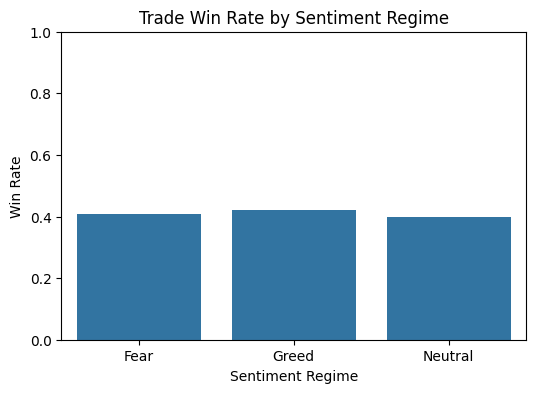

In [ ]:
profit_rate = (df.groupby("sentiment_regime")["is_profitable"].mean().reset_index())

plt.figure(figsize=(6,4))
sns.barplot(data=profit_rate, x="sentiment_regime", y="is_profitable")
plt.title("Trade Win Rate by Sentiment Regime")
plt.ylabel("Win Rate")
plt.xlabel("Sentiment Regime")
plt.ylim(0,1)
plt.show()

In [ ]:
df_final.shape

(211218, 19)

In [ ]:
df_final.to_csv("processed_data.csv",index=False)